## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
from pandas import DataFrame
import pandas as pd

# Number of training examples
n_train = X_train.shape[0]
print("Training array shape = ", X_train.shape)

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = [X_train.shape[1], X_train.shape[2]]

# How many unique classes/labels there are in the dataset.
df = pd.read_csv('signnames.csv')
n_classes = df.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Training array shape =  (34799, 32, 32, 3)
Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). 

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

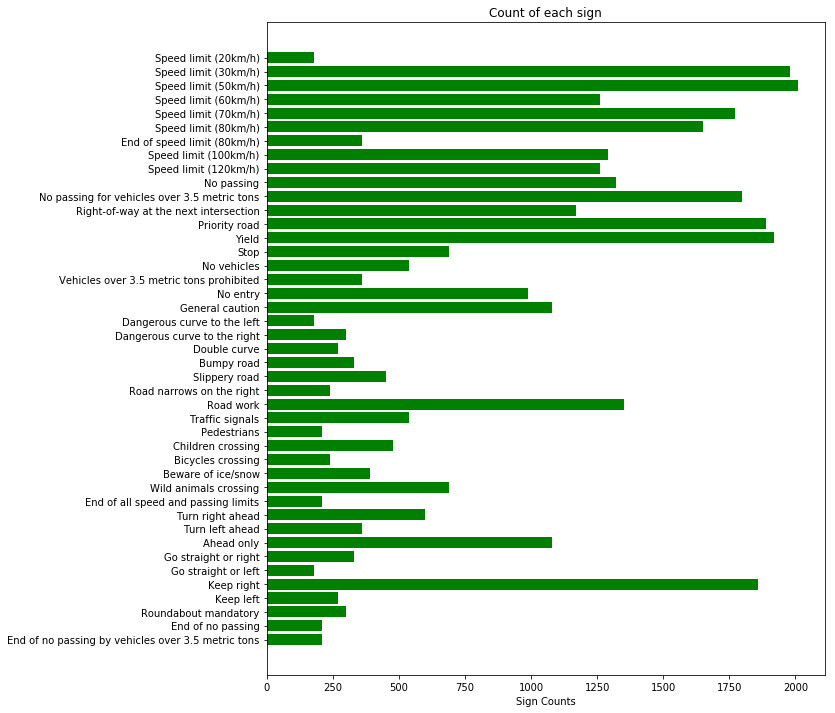

In [4]:
#Count of each sign in the training set

#Get count of 
unique_labels, count_labels = np.unique(y_train, return_counts=True)
count_signs = dict(zip(unique_labels, count_labels))

#Check if count is equal to the number of training examples
assert(n_train == count_labels.sum())

#Plot it as a bar graph
fig, ax = plt.subplots(figsize = (10,12))
ax.barh(unique_labels, count_labels, align='center',
        color='green', ecolor='black')
ax.set_yticks(unique_labels)
ax.set_yticklabels(df['SignName'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Sign Counts')
ax.set_title('Count of each sign')

plt.show()

In [5]:
#Helper function for images
import math
import cv2
from pylab import *

def visualize_images(input_images, num_cols, figure_name, cmap = None):
    "Shows input images by stacking them in num_cols columns"
    fig, axes = plt.subplots((int)((len(input_images) + 1) /num_cols), num_cols, figsize=(16, 6),
                            subplot_kw={'xticks': [], 'yticks': []})

    fig = plt.gcf()
    fig.canvas.set_window_title(figure_name)
    
    print("Images for ", figure_name)
    
    for ax, image in zip(axes.flat, input_images):
        if(image.shape[2]==1):
            ax.imshow(image[:,:,0], cmap = cmap)
        else:
            ax.imshow(image, interpolation="nearest", cmap=cmap)

    plt.show()
    
def grayscale(img):
    """Applies the Grayscale transform
    Note: This function can work with numpy nd array
    Matlab uses this for converting to gray scale 
    This is also the Y(brightness info) value for the YUV space 
    So it is good to have it for edge detection
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return (np.dot(img[...,:3], [0.299, 0.587, 0.114]).astype(int)).reshape(img.shape[0], img.shape[1], img.shape[2], 1)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def per_image_standardization(image):
    """This is the same equation used by tensorflow"""
    adjusted_stddev = max(np.std(image), 1.0/(math.sqrt(np.prod(image.shape))))
    return (image - np.mean(image)) / adjusted_stddev

def simple_normalize(image):
    """Using CV2 to normalize the image"""
    cv2.normalize(image, image, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
def histeq(im,nbr_bins=256):
    """  Histogram equalization of a grayscale image. 
         Not used in this programme
    """

    # get image histogram
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)

    return im2.reshape(im.shape)
    
def normalize_image(image):
    """Change the image values to be on the range 0 - 1"""
    min_range = 0.1
    max_range = 0.9
    return (min_range \
            + (((image - np.min(image)) * (max_range - min_range))/(np.max(image) - np.min(image))))

Images for  Speed limit (20km/h)


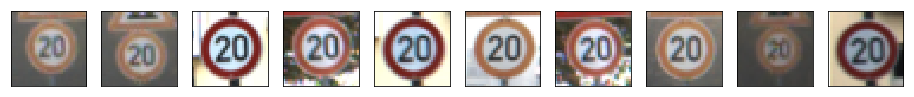

Images for  Speed limit (30km/h)


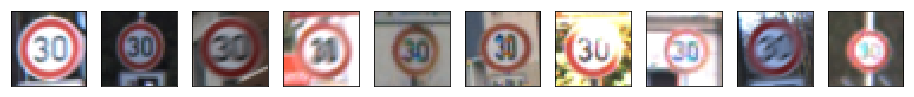

Images for  Speed limit (50km/h)


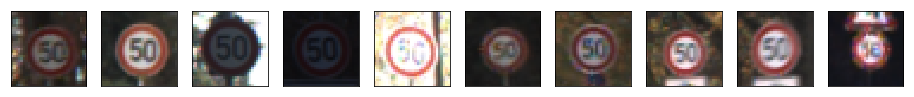

Images for  Speed limit (60km/h)


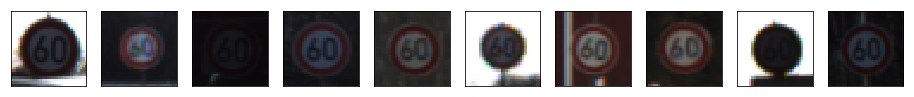

Images for  Speed limit (70km/h)


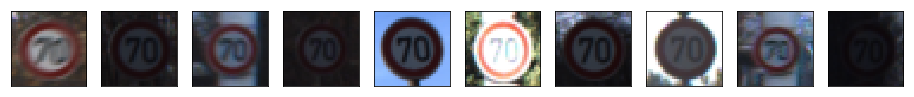

Images for  Speed limit (80km/h)


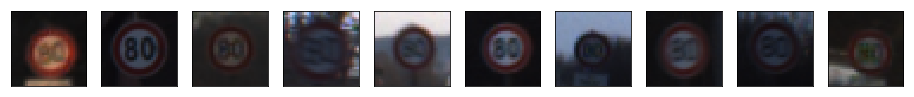

Images for  End of speed limit (80km/h)


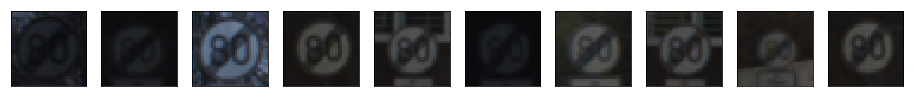

Images for  Speed limit (100km/h)


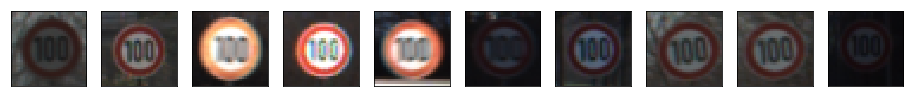

Images for  Speed limit (120km/h)


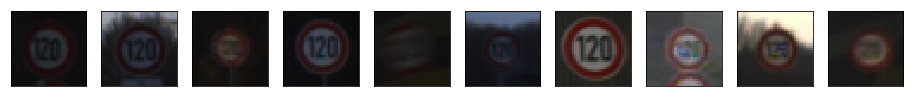

Images for  No passing


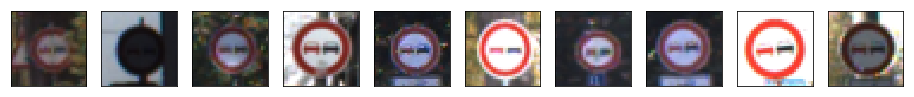

Images for  No passing for vehicles over 3.5 metric tons


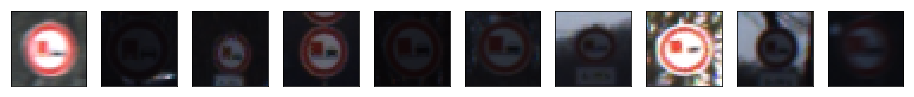

Images for  Right-of-way at the next intersection


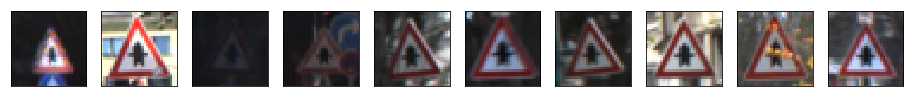

Images for  Priority road


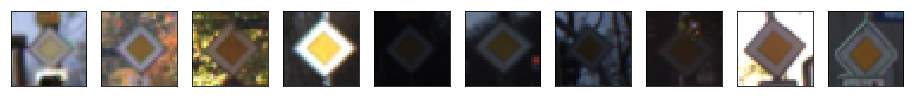

Images for  Yield


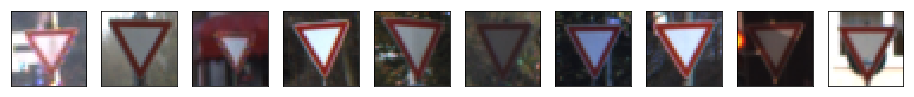

Images for  Stop


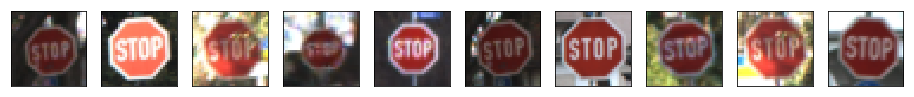

Images for  No vehicles


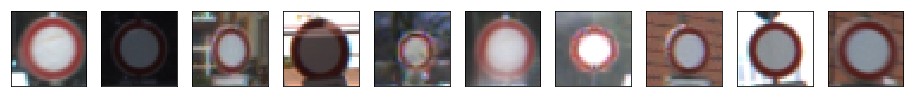

Images for  Vehicles over 3.5 metric tons prohibited


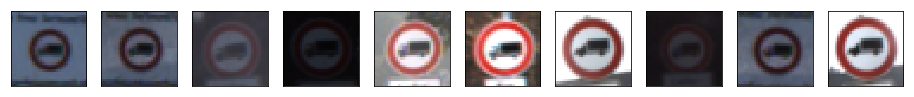

Images for  No entry


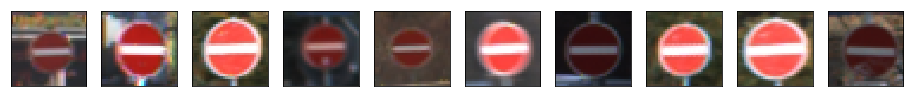

Images for  General caution


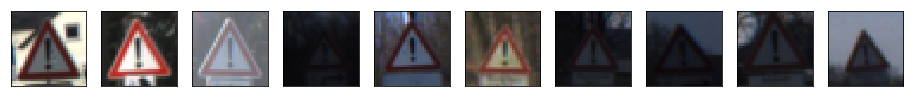

Images for  Dangerous curve to the left


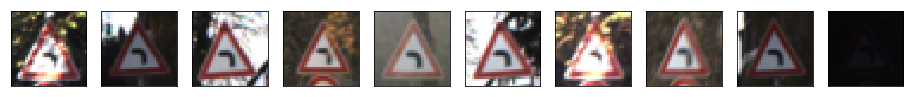

Images for  Dangerous curve to the right


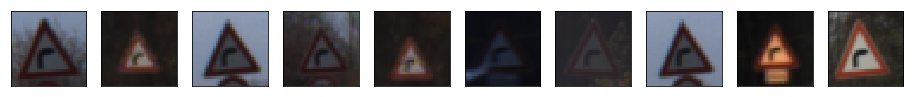

Images for  Double curve


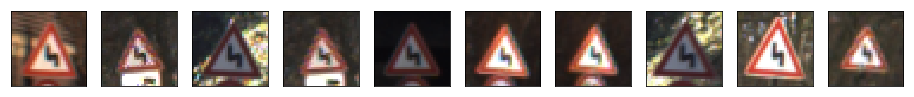

Images for  Bumpy road


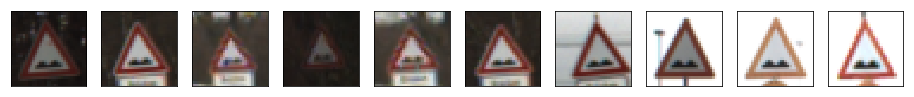

Images for  Slippery road


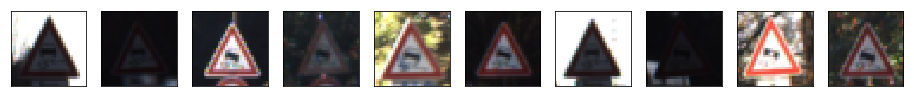

Images for  Road narrows on the right


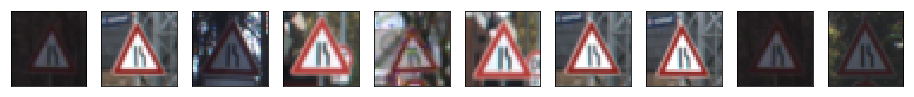

Images for  Road work


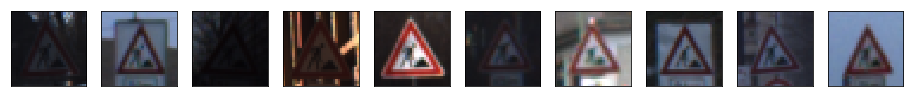

Images for  Traffic signals


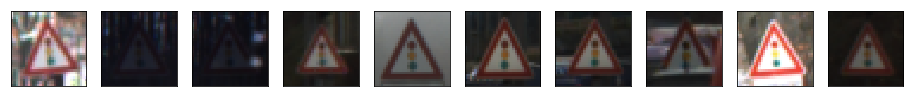

Images for  Pedestrians


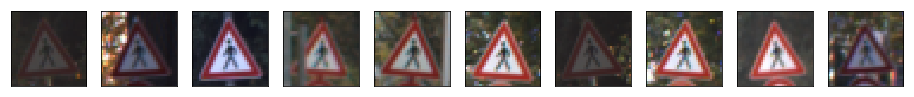

Images for  Children crossing


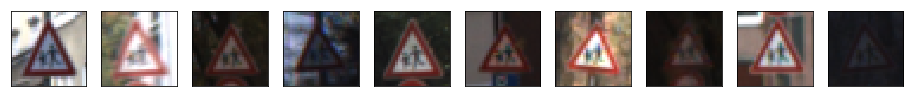

Images for  Bicycles crossing


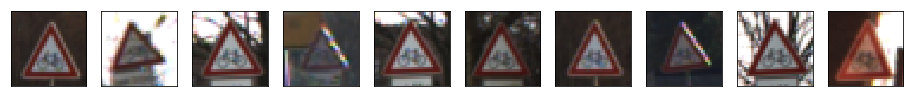

Images for  Beware of ice/snow


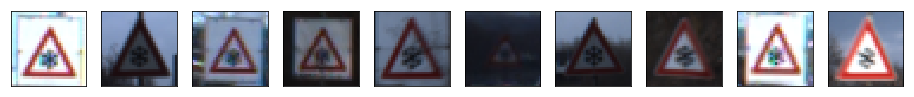

Images for  Wild animals crossing


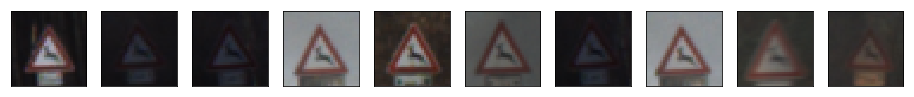

Images for  End of all speed and passing limits


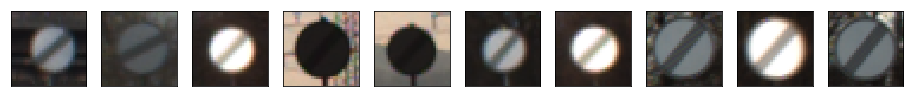

Images for  Turn right ahead


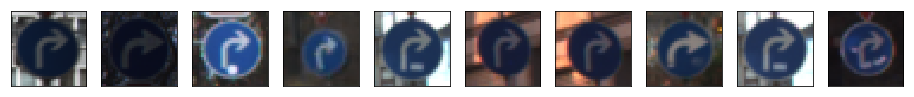

Images for  Turn left ahead


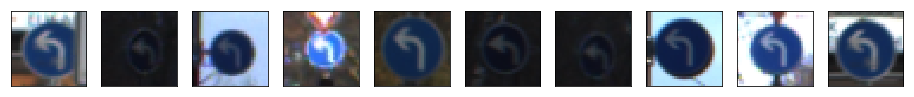

Images for  Ahead only


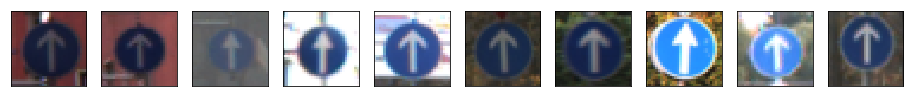

Images for  Go straight or right


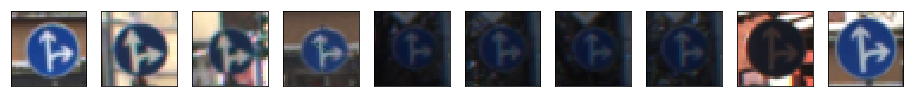

Images for  Go straight or left


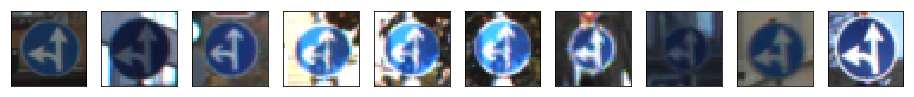

Images for  Keep right


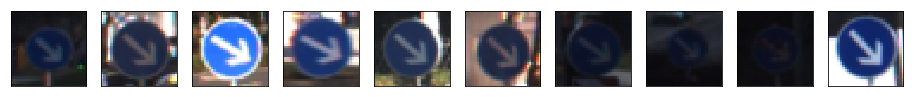

Images for  Keep left


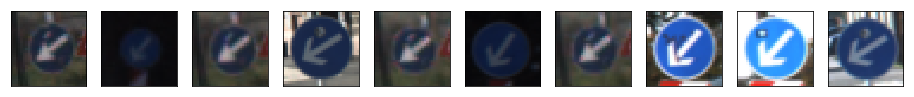

Images for  Roundabout mandatory


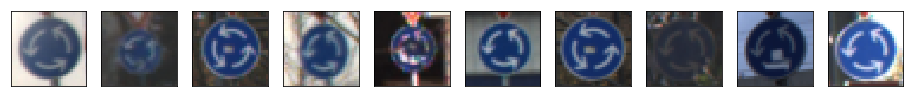

Images for  End of no passing


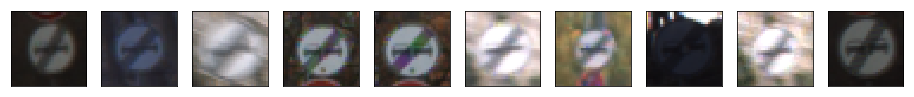

Images for  End of no passing by vehicles over 3.5 metric tons


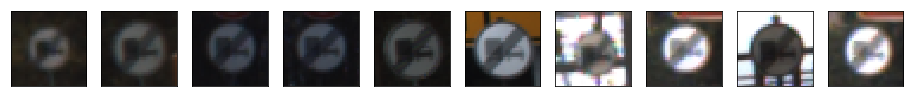

In [6]:
#Visualize images from every class
import random
num_images = 10
images_per_column = 10

#Get num_images from each class type and display them in images_per_column
for class_index in df['ClassId']: 
    train_image_indices,  = np.where(y_train==class_index)
    train_image_indices = random.sample(list(train_image_indices), num_images)
    visualize_images(X_train[train_image_indices], images_per_column, df['SignName'][class_index])

#### Augment the datset by transforming the original images and adding them to the training dataset. 
This is helpful as the network can be made more robust if it learns from images which are slightly translated, rotated, blurred, scaled and sheared. The new dataset has same number of images for all the classes. Earlier some of the classes only had less than 200 images which makes it harder for a network to learn the features. Perturbing and adding the images to the dataset is quite cruicial to increase the accuracy of the network

In [ ]:
#Helper functions for transforming the images to generate more images

import cv2 
import random

def translate_image(image, pos_range=2):
    """Perturbs the image by translating the image by - pos_range to + pos_range pixels"""
    rows, cols = image.shape[:2] 
    pos_x = pos_range * np.random.uniform() - pos_range/2
    pos_y = pos_range * np.random.uniform() - pos_range/2
    pos_M = np.float32([[1, 0, pos_x],[0, 1, pos_y]])

    return cv2.warpAffine(image, pos_M, (cols,rows))

def scale_image(image, scale = [1.0, 1.1, 1.2]):
    """Perturbs the image by the scale randomly selected from the 'scale' array"""
    scale_M = random.sample(scale, 1)[0]
    image = cv2.resize(image, None, fx = scale_M, fy = scale_M, interpolation = cv2.INTER_AREA)
    return image[0:32, 0:32, :]

def rotate_image(image, rot_range = 2):
    """Perturbs the image by rotation it by an angle randomly selected from rot_rangle"""
    rows, cols = image.shape[:2] 
    rot = np.random.uniform(rot_range)- rot_range/2
    rot_M = cv2.getRotationMatrix2D((cols/2, rows/2), rot, 1)
    
    return cv2.warpAffine(image, rot_M, (cols,rows))

def affine_image(image, affine_range = 2):
    #Affine Transform
    rows, cols = image.shape[:2] 
    pts1 = np.float32([[5, 5],[10, 5],[5, 10]])

    pt1 = 5 + affine_range * np.random.uniform() - affine_range/2
    pt2 = 10 + affine_range * np.random.uniform() - affine_range/2

    pts2 = np.float32([[pt1, 5],[pt2, pt1],[5, pt2]])

    affine_M = cv2.getAffineTransform(pts1, pts2)
    return cv2.warpAffine(image, affine_M, (cols,rows))

def transform_image(image, pos_range = 2, rot_range = 2, scale = [1, 1.1], affine_range = 2):    
    image = translate_image(image, pos_range=2) 
    image = rotate_image(image, rot_range = 2)
    image = scale_image(image, scale = [1, 1.1, 1.2])
    is_blurred = random.sample([0, 1], 1)
    if is_blurred[0]:
        image = cv2.GaussianBlur(image,(3,3),0)

    return image

In [ ]:
classes, counts = np.unique(y_train, return_counts=True)
max_count = counts.max()
print("Making all classes to have images count equals to ", max_count)
#Get num_images from each class type and display them in images_per_column
for class_index, count in zip(classes, counts):
    print("Adding transformed images for class = ", class_index)
    for index in range(max_count - count):
        train_image_indices,  = np.where(y_train==class_index)
        train_image_index = random.sample(list(train_image_indices), 1)
        perturbed_image = transform_image(X_train[train_image_index][0, :, :, :])
        X_train = np.vstack((X_train, perturbed_image.reshape([1, 32, 32, 3])))
        y_train = np.concatenate((y_train, class_index.reshape([1])))
    

Making all classes to have images count equals to  2010
Adding transformed images for class =  0
Adding transformed images for class =  1
Adding transformed images for class =  2
Adding transformed images for class =  3
Adding transformed images for class =  4
Adding transformed images for class =  5
Adding transformed images for class =  6
Adding transformed images for class =  7
Adding transformed images for class =  8
Adding transformed images for class =  9
Adding transformed images for class =  10
Adding transformed images for class =  11
Adding transformed images for class =  12
Adding transformed images for class =  13
Adding transformed images for class =  14
Adding transformed images for class =  15
Adding transformed images for class =  16
Adding transformed images for class =  17
Adding transformed images for class =  18
Adding transformed images for class =  19
Adding transformed images for class =  20
Adding transformed images for class =  21
Adding transformed images for 

In [ ]:
#Visualize the distribution of the augmented data

#Get count of 
unique_labels, count_labels = np.unique(y_train, return_counts=True)
count_signs = dict(zip(unique_labels, count_labels))

#Plot it as a bar graph
fig, ax = plt.subplots(figsize = (10,12))
ax.barh(unique_labels, count_labels, align='center',
        color='green', ecolor='black')
ax.set_yticks(unique_labels)
ax.set_yticklabels(df['SignName'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Sign Counts')
ax.set_title('Count of each sign')

plt.show()

In [ ]:
#Pickle the data as it takes a lot of time to generate it

import os
augmented_data_file = 'data/train_augmented.p'

if not os.path.isfile(augmented_data_file):
    with open(augmented_data_file, 'wb') as pfile:
        pickle.dump(
            {
                'X_train': X_train,
                'y_train': y_train,
            },
            pfile, pickle.HIGHEST_PROTOCOL)

print('Data saved in pickle file')

In [ ]:
#Read the picked data
augmented_data_file = 'data/train_augmented.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']

----

## Step 2: Design and Test a Model Architecture
Using modified Lenet architecure

### Pre-process the Data Set (normalization, grayscale, etc.)

#### Pre-processing steps
1. Convert image to grayscale (Most of the signs that might have confusion in being similar are of the same color, so getting rid of color is helpful to speed up the network and can help in increasing accuracy because edges have better contract with grayscale images)
2. Perform per-image standardization (Center the image with zero mean and constant standard deviation. This makes sure that images with different brightness level (occuring because of the time they were taken, the exposure of lens, etc) almost have similar pixel values, thereby increasing accuracy
3. Normalize the image to be in 0 - 1 range

In [ ]:
#Visualize dataset with augmented images
print(X_train.shape)
print(y_train.shape)

#Visualize images from every class
import random
num_images = 10
images_per_column = 10

#Get num_images from each class type and display them in images_per_column
for class_index in df['ClassId']: 
    train_image_indices,  = np.where(y_train==class_index)
    train_image_indices = random.sample(list(train_image_indices), num_images)
    visualize_images(X_train[train_image_indices], images_per_column, df['SignName'][class_index])

In [ ]:
#Convert images to gray scale
X_train = grayscale(X_train)
X_valid = grayscale(X_valid)
X_test = grayscale(X_test)

In [ ]:
#Visualize image after grayscaling
image =X_train[10]
plt.figure(figsize=(1,1))
plt.imshow(image[:,:,0], cmap="gray")

In [ ]:
#Zero center and normalize the images
#This is only per image normalization, need to try data_set normalization as well
train_images = np.zeros(np.shape(X_train))

#Train images
for index in range(n_train):
    train_images[index] = normalize_image(per_image_standardization(X_train[index]))

#Validation images
X_valid_normalized = np.zeros(np.shape(X_valid))
for index in range(X_valid.shape[0]):
    #set_trace()
    X_valid_normalized[index] = normalize_image(per_image_standardization(X_valid[index]))
    
#Test Images
X_test_normalized = np.zeros(np.shape(X_test))
for index in range(X_test.shape[0]):
    X_test_normalized[index] = normalize_image(per_image_standardization(X_test[index]))

In [ ]:
#Visualize image after normalization 
print(train_images.shape)
image =train_images[10]
plt.figure(figsize=(1,1))
plt.imshow(image[:,:,0], cmap="gray")

In [ ]:
#Visualize images from every class
import random
num_images = 30
images_per_column = 10

#Get num_images from each class type and display them in images_per_column
for class_index in df['ClassId']: 
    train_image_indices,  = np.where(y_train==class_index)
    train_image_indices = random.sample(list(train_image_indices), num_images)
    visualize_images(train_images[train_image_indices], images_per_column, df['SignName'][class_index], cmap="gray")

In [ ]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128
rate = 0.0009


### Model Architecture


| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 Grayscale image   					| 
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 28x28x64 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x64 				|
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 28x28x128 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x128 				|
| Fully connected		| inputs 3200, outputs 1600      				|
| RELU					|												|
| Fully connected		| inputs 1600, outputs 500      				|
| RELU					|												|
| Fully connected		| inputs 500, outputs 200      					|
| RELU					|												|
| Fully connected		| inputs 200, outputs 43      					|
|						|												|
|						|												|

The network has been modified from the Lenet architecture. 
The accuracy with the initial architecture was low, so inorder for the network to learn more features, I increased the depth of the convolution layers. And, then to retain those features I added an additional fully connected layers to make sure that the input to output layers is not low. 
Adding depth to the network initialy increased the accuracy with if we add more of them and keep other layers similar then the accuracy dropped on the validation set. Adding more layers would be overkill for this dataset as we would be just overfitting on the dataset we have. Some of the images on which it fails are very dark images. Even it is very hard for me to interpret the signs myself. 

I followed the following approach for the network:
1. Used original Lenet with original dataset - 89%
2. Added only translated perturbed images - 91%
3. Added rotated, shear, blur, brighness to images with one perturbed image per original image - 81% (It dropped)
4. Increased depth of the network - 83%
5. Added extra fully connected layer -86% but was 92% on only perturbed images
5. Added perturbed images to have equal number of images in the dataset - 93%
6. Adjust epochs and learning rate - 95%

In [ ]:
### Model architecture is defined here

from tensorflow.contrib.layers import flatten

def traffic_sign_nn(x):
    mu = 0
    sigma = 0.1

    #Layer 1: Convolution. Input 32x32x1. Output 28x28x64
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, X_train.shape[3], 64), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(64))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #Activation
    conv1 = tf.nn.relu(conv1)

    #Pooling. Input = 28x28x64. Output 14x14x64
    maxpool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolution. Output = 10x10x128
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 64, 128), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(128))
    conv2 = tf.nn.conv2d(maxpool1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    #Activation
    conv2 = tf.nn.relu(conv2)

    #Pooling. Input = 10x10x128. Output = 5 x 5 x 128
    maxpool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Flatten. Input = 5 x 5 x 128. Output = 3200
    fc0 = flatten(maxpool2)

    #Layer 3: Fully Connected . Input = 3200. Output = 1600
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3200, 1600), mean = mu, stddev= sigma))
    fc1_b = tf.Variable(tf.zeros(1600))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    #Activation
    fc1 = tf.nn.relu(fc1)

    #Layer 4: Fully Connected . Input = 120. Output = 84
    fc2_W = tf.Variable(tf.truncated_normal(shape=(1600, 500), mean = mu, stddev= sigma))
    fc2_b = tf.Variable(tf.zeros(500))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b

    #Activation
    fc2 = tf.nn.relu(fc2)

    #Layer 4: Fully Connected . Input = 120. Output = 84
    fc3_W = tf.Variable(tf.truncated_normal(shape=(500, 200), mean = mu, stddev= sigma))
    fc3_b = tf.Variable(tf.zeros(200))
    fc3   = tf.matmul(fc2, fc3_W) + fc3_b

    #Activation
    fc3 = tf.nn.relu(fc3)


    #Layer 5: Fully Connected . Input = 84. Output = 43
    fc4_W = tf.Variable(tf.truncated_normal(shape=(200, 43), mean = mu, stddev= sigma))
    fc4_b = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(fc3, fc4_W) + fc4_b
    
    nn_params = {
        "conv1": conv1,
        "maxpool1": maxpool1,
        "conv2": conv2,
        "maxpool2": maxpool2,
        "fc0": fc0,
        "fc1": fc1,
        "fc2": fc2,
        "fc3": fc3,
        "logits": logits
    }

    return logits, nn_params

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Model training
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

In [ ]:
x = tf.placeholder(tf.float32, (None, 32, 32, X_train.shape[3]))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [ ]:
logits, nn_params = traffic_sign_nn(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    """
    Evaluate function to calculate the accuracy
    """
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
#Train the model
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(train_images)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        train_images, y_train = shuffle(train_images, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = train_images[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_normalized, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './Traffic_NN')
    print("Model saved")

In [ ]:
#Test the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

Testing on 5 images downloaded from web

### Load and Output the Images

In [ ]:

import cv2
import numpy as np
import os

image_path = os.path.dirname('data/web/')
def load_web_dataset( ) :
    X_test_web =[]
    for file_name in os.listdir(image_path):
        img = np.array(cv2.imread(os.path.join(image_path, file_name)))
        img = img[...,::-1]
        img = cv2.resize(img, (32, 32), fx = 0, fy = 0, interpolation = cv2.INTER_AREA)
        X_test_web.append(img)
    return X_test_web

In [ ]:
### Load the images and plot them here.
X_test_web = np.array(load_web_dataset())
visualize_images(X_test_web, 5, 'test_web')
print(X_test_web.shape)

In [ ]:
#Labels for the web data
y_test_web = np.array([35, 14, 9, 40, 7])
print(y_test_web.shape)

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
#Preprocess similar to training images
X_test_web = grayscale(X_test_web)

X_test_web_normalized = np.zeros(np.shape(X_test_web))
for index in range(X_test_web.shape[0]):
    X_test_web_normalized[index] = normalize_image(per_image_standardization(X_test_web[index]))
    
print(X_test_web_normalized.shape)

In [ ]:
correct_prediction = tf.argmax(logits, 1)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    sess = tf.get_default_session()
    result = sess.run(correct_prediction, feed_dict={x: X_test_web_normalized, y: y_test_web})
print(result)

### Analyze Performance

#### As the images downloadded from the nweb are of good quality wand without any occlusion, blur, other distortions. So, the NN classifier is able to get classify all of them correctly

In [ ]:
### Calculate the accuracy for these 5 new images. 

In [ ]:
perf = [a for a,b in zip(y_test_web, result) if a == b]
print("Accuracy on web images = ", len(perf)/ len(result))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image).


In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

softmax_prob = tf.nn.top_k(tf.nn.softmax(logits), k=5, sorted=True, name=None)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    sess = tf.get_default_session()
    result = sess.run(softmax_prob, feed_dict={x: X_test_web_normalized, y: y_test_web})

print(result)

In [ ]:
#Visualize probabilities in bar chart
for indices, values in enumerate(result.values):
    fig = plt.figure()    
    plt.bar(result.indices[indices][:], values, color="blue")
    plt.axis([0, 42, 0, 1])

In [ ]:
#Visualize what other classes could be confused by the classifier
import random
num_images = 6
images_per_column = 6

#Get num_images from each class type and display them in images_per_column
for num, [test_image, class_indices] in enumerate(zip(X_test_web, result.indices)):
    count = 0
    print(class_indices)
    images = np.zeros([6, 32, 32, 1])
    images[count] = test_image
    count = count + 1
    for class_index in class_indices:
        train_image_indices,  = np.where(y_train==class_index)
        train_image_indices = random.sample(list(train_image_indices), 1)
        images[count] = train_images[train_image_indices]
        count= count + 1
    visualize_images(images, images_per_column, df['SignName'][y_test_web[num]])

---

## Step 4 : Visualize the Neural Network's State with Test Images

 This Section acts as an  excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(session, image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,50, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
print(train_images[300][:,:, 0].shape)
plt.figure(figsize=(1,1))
plt.imshow(train_images[300][:,:, 0], cmap='gray')

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    sess = tf.get_default_session()
    outputFeatureMap(sess, np.array([train_images[300]]), nn_params["conv1"])